In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#from skimage import data
#from skimage.transform import swirl

#from skimage import io


In [2]:
import numpy as np

In [3]:
x = np.linspace(-1,1,100)

In [4]:
norm = 1/(1-np.exp(-1*2))
y = x/(1-np.exp(-x*2))/norm

y = x**2


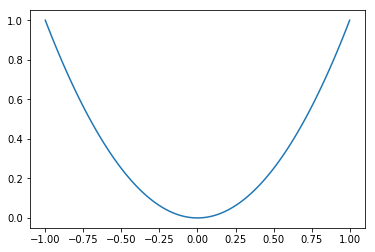

In [5]:
plt.plot(x,y)

In [7]:
from levelscape.sky.sky_models import sky_color
from colorpy import colormodels



In [9]:
from levelscape.sky.sky_models import Mx, My, MY
turbidity = 1
a = np.array([[turbidity],[1.1]])
Ax, Bx, Cx, Dx, Ex = Mx.dot(a)
Ay, By, Cy, Dy, Ey = My.dot(a)
AY, BY, CY, DY, EY = MY.dot(a)

In [10]:
#%time colors_xyY = sky_color(theta_.ravel(), gamma_.ravel(),np.pi/2-sun_theta_phi[0], turbidity=5)


In [11]:
import Pysolar

In [12]:
from datetime import datetime, tzinfo
from Pysolar import GetAltitude as get_altitude
from Pysolar import GetAzimuth as get_azimuth

class Sky():
    def __init__(self,date=datetime(2018,5,6,18,30,0,0),lon=5.747832,lat= 45.202847):
        self.lon = lon
        self.lat = lat
        self.date = date

    def get_sun_position(self,date=None):
        if date is not None: 
            self.date = date
        self.altitude = np.pi/2-get_altitude(self.lat,self.lon, self.date)*np.pi/180
        self.azimuth  = get_azimuth(self.lat,self.lon, self.date,elevation=0)*np.pi/180
        return self.altitude, self.azimuth


In [13]:
get_altitude(5.74,45.20,datetime.now() )

40.1600199927857

In [14]:
d = datetime(2018,5,6,18,30,0,0)

In [15]:
sky = Sky()

In [16]:
#-np.pi -> np/2
np.pi/2

1.5707963267948966

In [17]:
sky.get_sun_position(date=datetime(2018,5,6,18,18))

(1.494174489850011, -1.9113178694537742)

In [18]:
np.mod(0,2*np.pi)

0.0

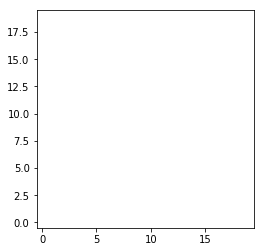

In [20]:
from colorpy import colormodels
nx =ny = 20
theta,phi = np.meshgrid(np.linspace(0.1,np.pi/2,nx),np.linspace(0.01,2*np.pi,ny))
sun_theta_phi = np.array([np.pi/2*0.5,np.pi]) #sun south at 45° above the horizon

def sph2cart(az, el, r):
    rcos_theta = r * np.cos(el)
    x = rcos_theta * np.cos(az)
    y = rcos_theta * np.sin(az)
    z = r * np.sin(el)
    return x, y, z

x,y,z =  sph2cart(phi.ravel(),theta.ravel(),1)
sun_x,sun_y,sun_z = sph2cart(sun_theta_phi[1],sun_theta_phi[0],1)

gamma_ = np.arccos(np.vstack([x,y,z]).T.dot(np.array([[sun_x,sun_y,sun_z]]).T)).reshape([nx,ny])
theta_ = np.pi/2-theta


colors_xyY = sky_color(theta_.ravel(), gamma_.ravel(),np.pi/2-sun_theta_phi[0], turbidity=5)
colors_xyz = colormodels.xyz_color_from_xyY(colors_xyY[0], colors_xyY[1], colors_xyY[2])
colors = colormodels.rgb_from_xyz(colors_xyz)#/255.
colors = np.clip(colors,0,1)

plt.imshow(np.stack([colors.T.reshape([nx,ny,3])[:,:,0],
          colors.T.reshape([nx,ny,3])[:,:,1],
          colors.T.reshape([nx,ny,3])[:,:,2]]).T,origin='lower')

# angular distance 

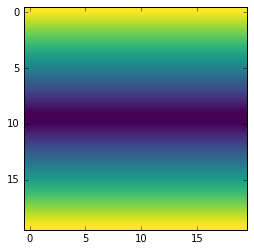

In [29]:
nx =ny = 20
theta,phi = np.meshgrid(np.linspace(0.1,np.pi/2,nx),np.linspace(0.01,2*np.pi,ny))
sun_theta_phi = np.array([np.pi/4,np.pi]) #sun south at 45° above the horizon

gamma = (np.sin(phi) * np.sin(sun_theta_phi[1]) * np.cos(theta-sun_theta_phi[0]) +
            np.cos(phi) * np.cos(sun_theta_phi[1]))
plt.imshow(np.arccos(gamma),cmap='viridis')

# haversine 

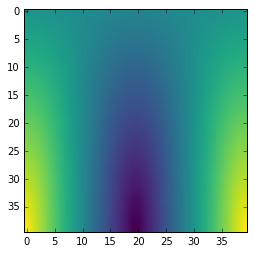

In [61]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in radian)

    All args must be of equal length.    

    """
    lat1 = np.pi/2-lat1
    lat2 = np.pi/2-lat2
    #lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))

    return c

ny =40
nx = 40
theta,phi = np.meshgrid(np.linspace(0.1,np.pi/2,ny),np.linspace(0.01,2*np.pi,nx))
sun_theta_phi = np.array([np.pi/2,np.pi]) #sun south at 45° above the horizon

# gamma = (np.sin(phi) * np.sin(sun_theta_phi[1]) * np.cos(theta-sun_theta_phi[0]) +
#             np.cos(phi) * np.cos(sun_theta_phi[1]))

plt.imshow(haversine_np(lon1=phi,lat1=theta,lon2=sun_theta_phi[1],lat2=sun_theta_phi[0]).T,cmap='viridis',)

In [64]:
#%timeit 
gamma = haversine_np(lon1=phi,lat1=theta,lon2=sun_theta_phi[1],lat2=sun_theta_phi[0])

In [65]:
%timeit sky_color(theta.ravel(), gamma.ravel(), sun_theta_phi[0], turbidity=12)

The slowest run took 4.64 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.1 ms per loop


In [45]:
%timeit haversine_np(lon1=phi,lat1=theta,lon2=np.pi/2,lat2=np.pi/4)

1000 loops, best of 3: 246 µs per loop


In [26]:
gamma

array([[ 0.71254552,  0.71287526,  0.71317023,  0.71342867,  0.71364904,
         0.71383001,  0.7139705 ,  0.71406967,  0.71412693,  0.71414193,
         0.71411458,  0.71404504,  0.71393374,  0.71378134,  0.71358875,
         0.71335712,  0.71308785,  0.71278254,  0.71244303,  0.71207134],
       [ 0.84923229,  0.86023384,  0.87007557,  0.87869855,  0.88605112,
         0.89208925,  0.89677677,  0.90008562,  0.90199596,  0.90249637,
         0.90158383,  0.89926382,  0.89555024,  0.89046532,  0.88403952,
         0.87631133,  0.86732703,  0.85714044,  0.84581256,  0.83341124],
       [ 0.8941816 ,  0.91466653,  0.93299188,  0.9490479 ,  0.96273843,
         0.97398145,  0.98270964,  0.98887073,  0.99242779,  0.99335955,
         0.9916604 ,  0.98734054,  0.98042583,  0.97095769,  0.95899282,
         0.94460289,  0.92787409,  0.90890661,  0.88781404,  0.86472274],
       [ 0.84253785,  0.87029329,  0.89512269,  0.91687732,  0.93542689,
         0.95066029,  0.9624863 ,  0.97083407,  

In [56]:
x,y = np.meshgrid(np.linspace(1,5,5),np.linspace(1,5,5))

In [64]:
import itertools


array([ 1,  6,  2,  7,  3,  8,  4,  9,  5, 10, 10,  6,  6, 11,  7, 12,  8,
       13,  9, 14, 10, 15, 15, 11, 11, 16, 12, 17, 13, 18, 14, 19, 15, 20,
       20, 16, 16, 21, 17, 22, 18, 23, 19, 24, 20, 25, 25, 21])

In [51]:
xx = np.random.normal(size=100)

In [55]:
xx[range(100)+range(100)]

array([ 0.63676726,  0.37172578, -0.56578026, -0.47125261,  0.1542705 ,
        0.48713447,  2.19715117, -0.66948916, -0.03882904, -1.00590603,
        0.38592198, -0.46077035,  0.36131103,  1.00488406,  0.41770477,
       -0.4042294 , -0.07347344,  0.50195255,  0.64613846, -1.27496939,
        0.70439429, -1.02084802,  0.84746701,  0.62950102,  1.25980499,
       -1.14288252, -1.12514372,  0.97349786,  0.31666263, -0.71356468,
        1.53587941, -0.6090714 ,  0.52271785, -0.27561252, -0.58170557,
        0.43857303, -0.45088839, -0.69729021, -1.61226574,  0.56306065,
       -0.29225496, -0.87912935, -0.54172789,  0.12648564,  2.01855952,
       -0.76858223, -0.47013639,  1.24847519, -0.03698697,  1.51562415,
       -1.47235791,  2.07427354,  0.93675305,  1.27302611, -0.29927482,
        1.05640377, -1.02496124,  0.01266284,  1.30228941,  0.32795466,
       -1.07233046, -0.80771732,  0.32902198, -0.41387257,  1.81077394,
        1.71655493,  0.46439867, -1.09435917,  1.80263532, -1.04

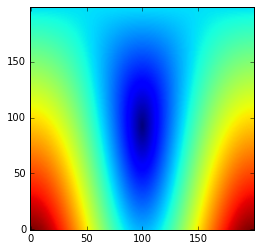

In [5]:
plt.imshow(gamma_.T,origin='lower')

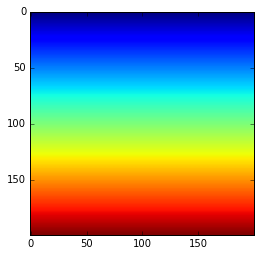

In [6]:
plt.imshow(theta.T)

In [31]:
colors_xyY[:,0]

array([ 1.48788489,  1.32275649,  2.67756504])

(array([ 17142.,  10888.,   5031.,   2882.,   1708.,   1048.,    649.,
           384.,    196.,     72.]),
 array([  2.67755541,   3.81587497,   4.95419454,   6.0925141 ,
          7.23083367,   8.36915323,   9.50747279,  10.64579236,
         11.78411192,  12.92243149,  14.06075105]),
 <a list of 10 Patch objects>)

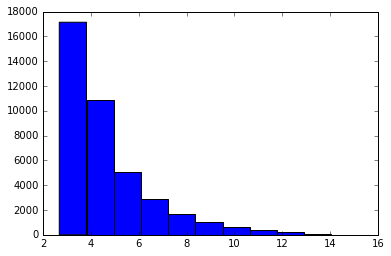

In [34]:
plt.hist(colors_xyY[2,:])

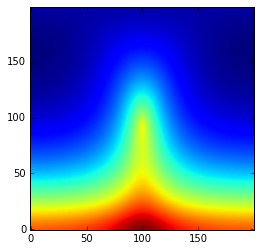

In [24]:
plt.imshow(colors_xyY.T.reshape([200,200,3])[:,:,1].T,origin='lower')

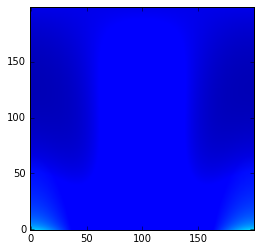

In [95]:
RGB_XYZ = np.array(
[[3.2406,-1.5372 ,-0.4986],
[-0.9689, 1.8758 ,0.0415],
[0.0557,-0.2040 ,1.0570]])

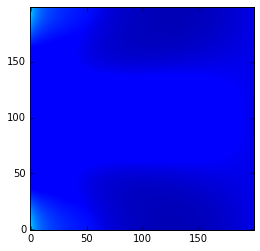

In [98]:
plt.imshow(colors.T.reshape([200,200,3]),origin='lower',vmin=0,vmax=1)

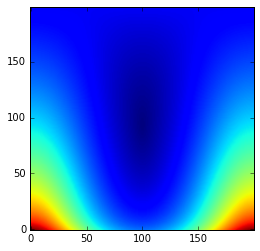

In [114]:
plt.imshow(colors_xyY.T.reshape([200,200,3])[:,:,0].T,origin='lower')

In [37]:
np.mean(colors_xyY,axis=1)

array([ 1.17636024,  0.81365626, -0.90006225])

In [38]:
RGB_XYZ.dot(colors_xyz).shape

(3, 40000)

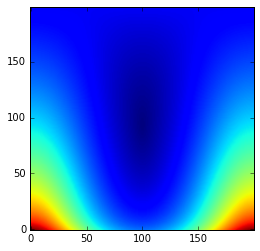

In [39]:
plt.imshow(colors_xyY.T.reshape([200,200,3])[:,:,0].T,origin='lower')

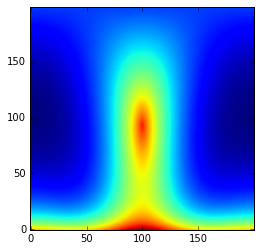

In [40]:
plt.imshow(colors_xyY.T.reshape([200,200,3])[:,:,1].T,origin='lower')

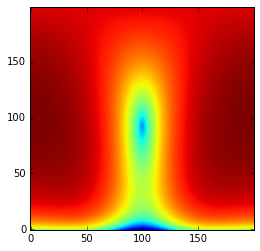

In [41]:
plt.imshow(colors_xyY.T.reshape([200,200,3])[:,:,2].T,origin='lower')

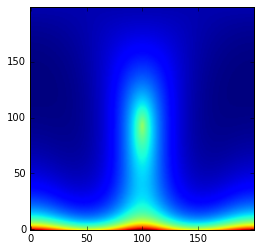

In [49]:
plt.imshow(colors_xyz.T.reshape([200,200,3])[:,:,2].T,origin='lower')

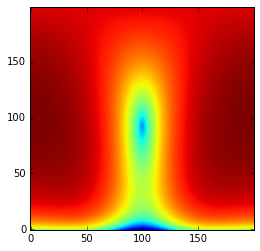

In [46]:
plt.imshow(colors_xyz.T.reshape([200,200,3])[:,:,1].T,origin='lower')

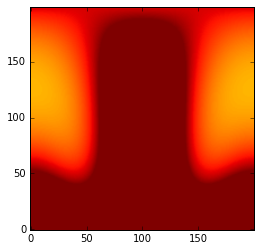

In [64]:
plt.imshow(colors.T.reshape([200,200,3])[:,:,2].T,vmin=0,vmax=1,origin='lower')

ValueError: 'norm' must be an instance of 'mcolors.Normalize'

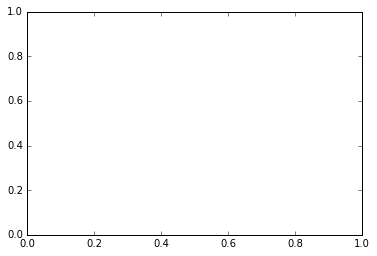

In [103]:
plt.imshow(colors[0,:].reshape([200,200]),0,255)

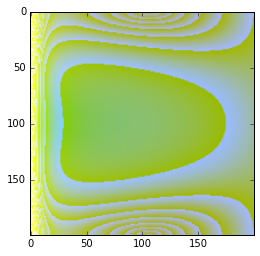

In [80]:
plt.imshow(colors_xyY.T.reshape([200,200,3]))

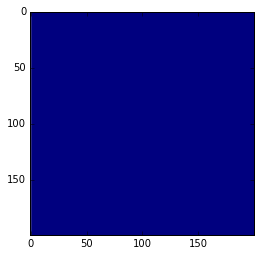

In [72]:
plt.imshow(np.reshape(colors[0,:],[200,200]))

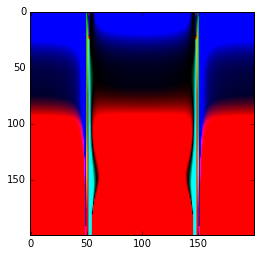

In [22]:
plt.imshow(np.reshape(colors.T,[200,200,3])[:,:,::])

In [ ]:


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray, interpolation='none')
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray, interpolation='none')
ax1.axis('off')

plt.show()